In [ ]:
 import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
#Read dataset
df = pd.read_csv('CICIDS2017_sample.csv')
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,234,2,2,64,232,32,32,32.000000,0.000000,116,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56657,133288,2,2,94,482,47,47,47.000000,0.000000,241,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56658,11507694,5,4,450,3525,450,0,90.000000,201.246118,3525,...,32,893.0,0.0,893,893,6503640.0,0.0,6503640,6503640,DoS
56659,11507707,8,6,416,11632,416,0,52.000000,147.078211,5792,...,32,897.0,0.0,897,897,6503122.0,0.0,6503122,6503122,DoS


In [ ]:
df.Label.value_counts()
df = df[(df["Label"] == "BENIGN") | (df["Label"] == "DoS")]
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,234,2,2,64,232,32,32,32.000000,0.000000,116,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56657,133288,2,2,94,482,47,47,47.000000,0.000000,241,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56658,11507694,5,4,450,3525,450,0,90.000000,201.246118,3525,...,32,893.0,0.0,893,893,6503640.0,0.0,6503640,6503640,DoS
56659,11507707,8,6,416,11632,416,0,52.000000,147.078211,5792,...,32,897.0,0.0,897,897,6503122.0,0.0,6503122,6503122,DoS


In [ ]:
# Min-max normalization
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Fill empty values by 0
df = df.fillna(0)

In [ ]:
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3.333333e-08,0.000144,0.000000,0.000162,0.000000,0.001327,0.003026,0.005833,0.003410,0.000000,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
1,1.186475e-03,0.006494,0.006277,0.005792,0.004923,0.024401,0.000000,0.009081,0.021490,0.373453,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
2,9.906083e-04,0.003175,0.002835,0.005110,0.002094,0.024401,0.000000,0.016024,0.030119,0.248968,...,0.533333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
3,1.196475e-03,0.006061,0.005568,0.005687,0.004990,0.024401,0.000000,0.009539,0.022218,0.373453,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
4,1.197875e-03,0.006927,0.005973,0.005818,0.005125,0.024401,0.000000,0.008564,0.020846,0.373453,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,1.950000e-06,0.000144,0.000202,0.000280,0.000011,0.001370,0.016137,0.010089,0.000000,0.009972,...,0.533333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
56657,1.110733e-03,0.000144,0.000202,0.000411,0.000022,0.002012,0.023701,0.014818,0.000000,0.020719,...,0.533333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
56658,9.589745e-02,0.000577,0.000405,0.001967,0.000164,0.019264,0.000000,0.028375,0.038820,0.303043,...,0.533333,0.000009,0.0,0.000009,0.000009,0.054652,0.0,0.054652,0.054652,DoS
56659,9.589756e-02,0.001010,0.000607,0.001818,0.000541,0.017808,0.000000,0.016394,0.028371,0.497937,...,0.533333,0.000009,0.0,0.000009,0.000009,0.054648,0.0,0.054648,0.054648,DoS


In [ ]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3.333333e-08,0.000144,0.000000,0.000162,0.000000,0.001327,0.003026,0.005833,0.003410,0.000000,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
1,1.186475e-03,0.006494,0.006277,0.005792,0.004923,0.024401,0.000000,0.009081,0.021490,0.373453,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
2,9.906083e-04,0.003175,0.002835,0.005110,0.002094,0.024401,0.000000,0.016024,0.030119,0.248968,...,0.533333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
3,1.196475e-03,0.006061,0.005568,0.005687,0.004990,0.024401,0.000000,0.009539,0.022218,0.373453,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
4,1.197875e-03,0.006927,0.005973,0.005818,0.005125,0.024401,0.000000,0.008564,0.020846,0.373453,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,1.950000e-06,0.000144,0.000202,0.000280,0.000011,0.001370,0.016137,0.010089,0.000000,0.009972,...,0.533333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
56657,1.110733e-03,0.000144,0.000202,0.000411,0.000022,0.002012,0.023701,0.014818,0.000000,0.020719,...,0.533333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
56658,9.589745e-02,0.000577,0.000405,0.001967,0.000164,0.019264,0.000000,0.028375,0.038820,0.303043,...,0.533333,0.000009,0.0,0.000009,0.000009,0.054652,0.0,0.054652,0.054652,1
56659,9.589756e-02,0.001010,0.000607,0.001818,0.000541,0.017808,0.000000,0.016394,0.028371,0.497937,...,0.533333,0.000009,0.0,0.000009,0.000009,0.054648,0.0,0.054648,0.054648,1


In [ ]:
X = df.drop(['Label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 42,stratify = y)

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=object)

In [ ]:
X_train.shape

(29236, 77)

In [ ]:
pd.Series(y_train).value_counts()

0    15912
1    13324
Name: count, dtype: int64

In [ ]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

Accuracy of RF: 0.9968874700718277
Precision of RF: 0.996887527107708
Recall of RF: 0.9968874700718277
F1-score of RF: 0.996887492190657
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6819
           1       1.00      1.00      1.00      5711

    accuracy                           1.00     12530
   macro avg       1.00      1.00      1.00     12530
weighted avg       1.00      1.00      1.00     12530



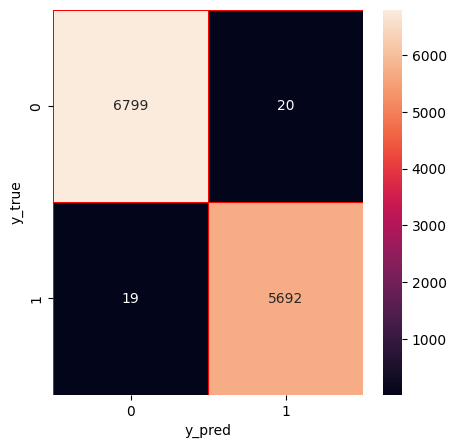

In [ ]:
# Random Forest training and prediction
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)
confusion_matrix(y_true,rf_test)

In [ ]:
rf_feature = rf.feature_importances_

In [ ]:
# calculate the average importance value of each feature
avg_feature = rf_feature
max(avg_feature)

In [ ]:
feature=(df.drop(['Label'],axis=1)).columns.values

In [ ]:
f_list = sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True)
f_list

[(0.0639, 'Bwd Packet Length Std'),
 (0.0593, 'Packet Length Std'),
 (0.0563, 'Bwd Packet Length Max'),
 (0.0563, 'Average Packet Size'),
 (0.0528, 'Avg Bwd Segment Size'),
 (0.0516, 'Max Packet Length'),
 (0.0416, 'Init_Win_bytes_forward'),
 (0.0412, 'Packet Length Mean'),
 (0.0409, 'Fwd Header Length.1'),
 (0.0369, 'Bwd Packet Length Mean'),
 (0.0366, 'Packet Length Variance'),
 (0.0363, 'Bwd Header Length'),
 (0.0348, 'Total Backward Packets'),
 (0.0347, 'Fwd Header Length'),
 (0.0266, 'Subflow Bwd Bytes'),
 (0.0265, 'Total Length of Bwd Packets'),
 (0.0256, 'Fwd Packet Length Max'),
 (0.0165, 'Subflow Bwd Packets'),
 (0.0151, 'Init_Win_bytes_backward'),
 (0.015, 'Subflow Fwd Bytes'),
 (0.0149, 'Subflow Fwd Packets'),
 (0.0133, 'Fwd Packet Length Mean'),
 (0.0133, 'Bwd Packet Length Min'),
 (0.0129, 'Total Length of Fwd Packets'),
 (0.0124, 'Idle Max'),
 (0.0122, 'Min Packet Length'),
 (0.0118, 'Fwd Packet Length Min'),
 (0.0118, 'Fwd IAT Max'),
 (0.011, 'Avg Fwd Segment Size'),
 (0

In [ ]:
len(f_list)

77

EXTRACT IMPORTANT FEATURES AND TRAIN MODELS AGAIN

In [ ]:
# Select the important features from top-importance to bottom-importance until the accumulated importance reaches 0.9 (out of 1)
Sum = 0
fs = []
ts= []
features = ["Init_Win_bytes_forward", "ACK Flag Count","Fwd Packets/s","Flow Packets/s","Flow IAT Max","Flow IAT Min","Flow Duration","Init_Win_bytes_backward","Subflow Bwd Bytes","Flow IAT Mean"]
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])
    if(f_list[i][1] in features):
        ts.append(f_list[i][1])
    if Sum>=0.9:
        break
print(len(fs))
fs

31


['Bwd Packet Length Std',
 'Packet Length Std',
 'Bwd Packet Length Max',
 'Average Packet Size',
 'Avg Bwd Segment Size',
 'Max Packet Length',
 'Init_Win_bytes_forward',
 'Packet Length Mean',
 'Fwd Header Length.1',
 'Bwd Packet Length Mean',
 'Packet Length Variance',
 'Bwd Header Length',
 'Total Backward Packets',
 'Fwd Header Length',
 'Subflow Bwd Bytes',
 'Total Length of Bwd Packets',
 'Fwd Packet Length Max',
 'Subflow Bwd Packets',
 'Init_Win_bytes_backward',
 'Subflow Fwd Bytes',
 'Subflow Fwd Packets',
 'Fwd Packet Length Mean',
 'Bwd Packet Length Min',
 'Total Length of Fwd Packets',
 'Idle Max',
 'Min Packet Length',
 'Fwd Packet Length Min',
 'Fwd IAT Max',
 'Avg Fwd Segment Size',
 'Fwd IAT Std',
 'Flow IAT Max']

In [ ]:
X_fs = df[features].values
X_fs

array([[9.30786133e-04, 1.00000000e+00, 1.66666667e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.36134454e-08],
       [4.45571899e-01, 0.00000000e+00, 1.07695297e-04, ...,
        9.46044922e-04, 4.93133562e-03, 1.11817325e-05],
       [4.45571899e-01, 0.00000000e+00, 6.44946007e-05, ...,
        9.46044922e-04, 2.09752384e-03, 1.99786555e-05],
       ...,
       [4.45571899e-01, 0.00000000e+00, 1.44830638e-07, ...,
        3.60107422e-03, 1.64214804e-04, 1.20879139e-02],
       [4.45571899e-01, 0.00000000e+00, 2.31728759e-07, ...,
        3.60107422e-03, 5.41885560e-04, 7.43872463e-03],
       [4.45571899e-01, 0.00000000e+00, 2.31638239e-07, ...,
        3.60107422e-03, 5.41885560e-04, 8.06176751e-03]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.7, test_size = 0.3, random_state = 42,stratify = y)

In [ ]:
X_train.shape

(29236, 10)

In [ ]:
pd.Series(y_train).value_counts()

0    15912
1    13324
Name: count, dtype: int64

In [ ]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

Accuracy of RF: 0.9968076616121309
Precision of RF: 0.9968093909806437
Recall of RF: 0.9968076616121309
F1-score of RF: 0.9968078865988692
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6819
           1       1.00      1.00      1.00      5711

    accuracy                           1.00     12530
   macro avg       1.00      1.00      1.00     12530
weighted avg       1.00      1.00      1.00     12530



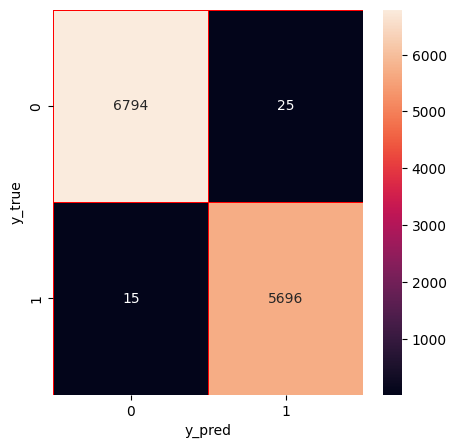

In [ ]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)
confusion_matrix(y_true,rf_test)

array([[6794,   25],
       [  15, 5696]])

In [ ]:
import pickle
pickle.dump(rf, open('model.pkl','wb'))